In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor, BaggingClassifier, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text, export_graphviz
from sklearn.linear_model import LinearRegression

# Data Wrangling

In [3]:
df = pd.read_csv("../data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
print(df.shape)

(8124, 23)


In [5]:
print(df.dtypes)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
df.value_counts()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
e      b          f            g          f        n     f                w             b          g           e            ?           k                         k                         w                       w                       p          w           t            p          w                  n           g          1
p      f          y            g          f        f     f                c             b          p           e            b           k                         k                         p                       n                       p          w           o            l          h                  v           d          1
                        

In [8]:
df_miss = df.isnull().sum()
print(df_miss)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [9]:
# categorical values into numeric values
df_num = df.apply(LabelEncoder().fit_transform)
df_num.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# Train Test Split

In [10]:
# all columns minus 'class' are features
X = df_num.drop(columns = ["class"])
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [15]:
# 'class' column is target
y = df_num['class']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [16]:
y.value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [18]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7434,3,2,3,0,5,1,1,0,7,0,...,2,7,7,0,2,2,4,7,3,1
7725,5,0,8,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,2,1
783,5,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,2,3,3
1928,2,2,8,0,5,1,1,0,3,1,...,0,7,7,0,2,1,0,2,3,1
7466,3,3,2,0,8,1,0,1,0,1,...,1,7,6,0,2,1,0,7,4,2


In [19]:
y_train.head()

7434    0
7725    0
783     0
1928    0
7466    1
Name: class, dtype: int64

# Feature Engineering

## Normalization

In [20]:
normalizer = MinMaxScaler()

In [21]:
normalizer.fit(X_train)

MinMaxScaler()

In [22]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [23]:
X_train_norm

array([[0.6       , 0.66666667, 0.33333333, ..., 0.875     , 0.6       ,
        0.16666667],
       [1.        , 0.        , 0.88888889, ..., 0.875     , 0.4       ,
        0.16666667],
       [1.        , 0.66666667, 0.88888889, ..., 0.25      , 0.6       ,
        0.5       ],
       ...,
       [1.        , 0.66666667, 0.33333333, ..., 0.375     , 0.6       ,
        0.16666667],
       [0.4       , 0.        , 0.44444444, ..., 0.375     , 0.8       ,
        0.        ],
       [1.        , 1.        , 0.33333333, ..., 0.375     , 1.        ,
        0.        ]])

In [24]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.6,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.636364,0.0,...,0.666667,0.875,0.875,0.0,0.666667,1.0,1.0,0.875,0.6,0.166667
1,1.0,0.000000,0.888889,0.0,0.625,1.0,1.0,0.0,0.181818,0.0,...,0.666667,0.875,0.875,0.0,0.666667,1.0,1.0,0.875,0.4,0.166667
2,1.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.500000
3,0.4,0.666667,0.888889,0.0,0.625,1.0,1.0,0.0,0.272727,1.0,...,0.000000,0.875,0.875,0.0,0.666667,0.5,0.0,0.250,0.6,0.166667
4,0.6,1.000000,0.222222,0.0,1.000,1.0,0.0,1.0,0.000000,1.0,...,0.333333,0.875,0.750,0.0,0.666667,0.5,0.0,0.875,0.8,0.333333


In [25]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.0,1.000000,0.444444,1.0,0.750,1.0,0.0,1.0,0.636364,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.833333
1,0.4,1.000000,0.333333,1.0,0.625,1.0,0.0,0.0,0.636364,1.0,...,0.666667,0.375,0.375,0.0,0.666667,0.5,1.0,0.250,1.0,0.000000
2,1.0,1.000000,1.000000,1.0,0.000,1.0,0.0,0.0,0.363636,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.375,0.4,0.500000
3,1.0,0.666667,0.888889,0.0,0.625,1.0,1.0,0.0,0.363636,1.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.250,0.0,0.166667
4,1.0,0.000000,0.444444,1.0,0.625,1.0,0.0,0.0,0.636364,1.0,...,0.666667,0.750,0.875,0.0,0.666667,0.5,1.0,0.375,0.8,0.000000


## Feature Selection

### Feature Scaling

In [26]:
# Selectors
numeric_features = selector(dtype_include=np.number)(X)
categorical_features = selector(dtype_exclude=np.number)(X)

# Preprocessing pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

### Correlation Map

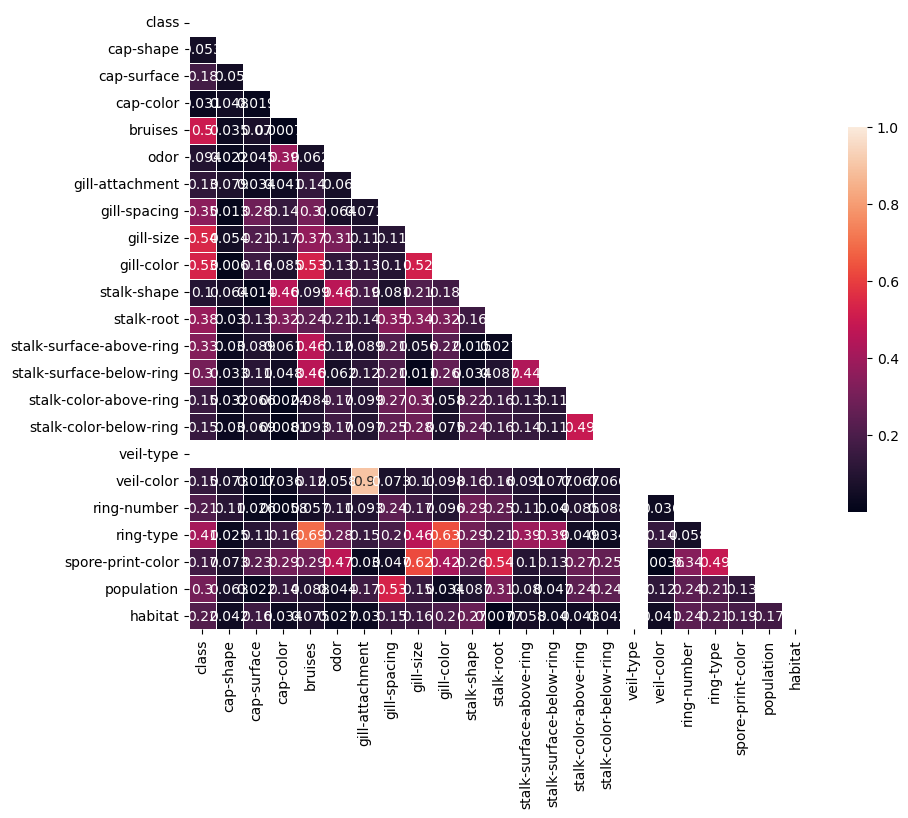

In [27]:
corr=np.abs(df_num.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [28]:
# dropping columns that are less correlated with the target
X_train_reduced = X_train_norm.drop(columns = ['cap-shape', 'cap-color', 'odor', 'stalk-shape'])
X_test_reduced = X_test_norm.drop(columns = ['cap-shape', 'cap-color', 'odor', 'stalk-shape'])

# Model Selection

In [52]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=20)),  # Select top 20 features
    ('classifier', RandomForestClassifier(random_state=42))
])

In [54]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit the model before hyperparameter tuning
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [55]:
print("🔍 Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

🔍 Baseline Accuracy: 1.0

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## KNN Classifier

In [29]:
knnc = KNeighborsClassifier(n_neighbors=3)

In [30]:
knnc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
pred_knnc = knnc.predict(X_test)
pred_knnc

array([1, 0, 0, ..., 1, 0, 0])

In [32]:
y_test.values

array([1, 0, 0, ..., 1, 0, 0])

In [33]:
knnc.score(X_test, y_test)

0.9987692307692307

## KNN Regression

### KNN Regression Initial Test

In [34]:
knnr = KNeighborsRegressor(n_neighbors=10)

In [35]:
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [36]:
knnr.score(X_test, y_test)

0.9879592344927695

### KNN Regressor with Feature Selection

In [37]:
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X_train_reduced, y_train)

knnr.score(X_test_reduced, y_test)

0.9997039156022812

## Linear Regression

In [38]:
lin_reg = LinearRegression()

In [39]:
lin_reg.fit(X_train_reduced, y_train)

LinearRegression()

In [40]:
pred_lr = lin_reg.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred_lr, y_test))
print("RMSE", mean_squared_error(pred_lr, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_reduced, y_test))

MAE 0.1703249457865441
RMSE 0.25222873801515033
R2 score 0.7449197841070034


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [41]:
lin_reg_coef = {feature : coef for feature, coef in zip(X_train_norm.columns, lin_reg.coef_)}
lin_reg_coef

{'cap-shape': 0.08614039483935881,
 'cap-surface': -0.4224600470903015,
 'cap-color': -0.07931508199738585,
 'bruises': -0.5116965033816421,
 'odor': 0.5392864064083575,
 'gill-attachment': -0.12997997879686554,
 'gill-spacing': -0.2570856546382643,
 'gill-size': -0.48759240216586974,
 'gill-color': -0.1549495733654868,
 'stalk-shape': -0.10806002782441361,
 'stalk-root': -0.07646337319502977,
 'stalk-surface-above-ring': -2.220446049250313e-16,
 'stalk-surface-below-ring': 1.37849430006992,
 'stalk-color-above-ring': 0.15205476158867265,
 'stalk-color-below-ring': 0.1636170380511999,
 'veil-type': -0.45683029240292927,
 'veil-color': -0.10753421059061355,
 'ring-number': 0.13443587050284622}

## Decision Tree

In [42]:
tree = DecisionTreeRegressor(max_depth=10)

In [43]:
tree.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=10)

In [44]:
X_train_norm

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0.6,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.636364,0.0,...,0.666667,0.875,0.875,0.0,0.666667,1.0,1.0,0.875,0.6,0.166667
1,1.0,0.000000,0.888889,0.0,0.625,1.0,1.0,0.0,0.181818,0.0,...,0.666667,0.875,0.875,0.0,0.666667,1.0,1.0,0.875,0.4,0.166667
2,1.0,0.666667,0.888889,1.0,0.375,1.0,0.0,0.0,0.454545,0.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,1.0,0.250,0.6,0.500000
3,0.4,0.666667,0.888889,0.0,0.625,1.0,1.0,0.0,0.272727,1.0,...,0.000000,0.875,0.875,0.0,0.666667,0.5,0.0,0.250,0.6,0.166667
4,0.6,1.000000,0.222222,0.0,1.000,1.0,0.0,1.0,0.000000,1.0,...,0.333333,0.875,0.750,0.0,0.666667,0.5,0.0,0.875,0.8,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,1.0,1.000000,0.222222,1.0,0.625,1.0,0.0,0.0,0.090909,0.0,...,0.666667,0.250,0.250,0.0,0.666667,1.0,0.0,0.875,0.2,1.000000
6495,1.0,0.000000,0.333333,0.0,0.250,1.0,0.0,0.0,0.272727,0.0,...,0.333333,0.750,0.500,0.0,0.666667,0.5,0.5,0.125,1.0,0.666667
6496,1.0,0.666667,0.333333,0.0,0.625,1.0,1.0,0.0,0.272727,1.0,...,0.666667,0.875,0.875,0.0,0.666667,0.5,0.0,0.375,0.6,0.166667
6497,0.4,0.000000,0.444444,1.0,0.625,1.0,0.0,0.0,0.454545,1.0,...,0.666667,0.375,0.375,0.0,0.666667,0.5,1.0,0.375,0.8,0.000000


In [45]:
y_test

380     1
3641    0
273     0
1029    0
684     0
       ..
3535    0
1643    0
6494    1
6       0
3175    0
Name: class, Length: 1625, dtype: int64

In [46]:
pred = tree.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_norm, y_test))

MAE 0.0
RMSE 0.0
R2 score 1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
tree_importance = {feature : importance for feature, importance in zip(X_train_norm.columns, tree.feature_importances_)}
tree_importance

{'cap-shape': 0.0,
 'cap-surface': 0.004036786742206492,
 'cap-color': 0.0034464266955427252,
 'bruises': 0.030199233167908644,
 'odor': 0.0,
 'gill-attachment': 0.0,
 'gill-spacing': 0.0,
 'gill-size': 0.12150865013343329,
 'gill-color': 0.34369118773001806,
 'stalk-shape': 0.023942677779150157,
 'stalk-root': 0.047634106522198856,
 'stalk-surface-above-ring': 0.0,
 'stalk-surface-below-ring': 0.006127008416212958,
 'stalk-color-above-ring': 0.0,
 'stalk-color-below-ring': 0.0,
 'veil-type': 0.0,
 'veil-color': 0.0,
 'ring-number': 0.019720381810798913,
 'ring-type': 0.0,
 'spore-print-color': 0.19616236506019544,
 'population': 0.17359166264931095,
 'habitat': 0.02993951329302358}

In [48]:
tree_viz = export_text(tree, feature_names=list(X_train_norm.columns))
print(tree_viz)

|--- gill-color <= 0.32
|   |--- population <= 0.70
|   |   |--- spore-print-color <= 0.19
|   |   |   |--- value: [1.00]
|   |   |--- spore-print-color >  0.19
|   |   |   |--- habitat <= 0.08
|   |   |   |   |--- value: [1.00]
|   |   |   |--- habitat >  0.08
|   |   |   |   |--- value: [0.00]
|   |--- population >  0.70
|   |   |--- stalk-root <= 0.50
|   |   |   |--- stalk-surface-below-ring <= 0.17
|   |   |   |   |--- cap-surface <= 0.83
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- cap-surface >  0.83
|   |   |   |   |   |--- value: [0.00]
|   |   |   |--- stalk-surface-below-ring >  0.17
|   |   |   |   |--- value: [1.00]
|   |   |--- stalk-root >  0.50
|   |   |   |--- value: [0.00]
|--- gill-color >  0.32
|   |--- spore-print-color <= 0.19
|   |   |--- stalk-root <= 0.12
|   |   |   |--- value: [0.00]
|   |   |--- stalk-root >  0.12
|   |   |   |--- value: [1.00]
|   |--- spore-print-color >  0.19
|   |   |--- gill-size <= 0.50
|   |   |   |--- ring-number <= 0.

In [49]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_norm, y_train)


dot_data = export_graphviz(tree, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_norm.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Grid Search

In [56]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2']
}

In [57]:
grid_search = GridSearchCV(model_pipeline, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1, verbose=1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Predict with best estimator
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarn

In [58]:
# Evaluation
print("✅ Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\n🏆 Best Parameters:\n", grid_search.best_params_)
print("\n📊 Classification Report (Tuned):\n", classification_report(y_test, y_pred_best))

✅ Tuned Model Accuracy: 1.0

🏆 Best Parameters:
 {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

📊 Classification Report (Tuned):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Ensemble Methods

## Bagging and Pasting

In [74]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [75]:
bagging_reg.fit(X_train_norm, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 max_samples=1000, n_estimators=100)

In [76]:
pred_bp = bagging_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred_bp, y_test))
print("RMSE", mean_squared_error(pred_bp, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_norm, y_test))

MAE 0.5002833584843572
RMSE 0.5105562792919114
R2 score -0.04404717093623911


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [89]:
bagging_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42))
])

bagging_pipeline.fit(X_train, y_train)
y_pred_bag = bagging_pipeline.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
print(f"Bagging Accuracy: {acc_bag:.4f}")

Bagging Accuracy: 1.0000


## Random Forests

In [79]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [80]:
forest.fit(X_train_norm, y_train)

RandomForestRegressor(max_depth=20)

In [81]:
pred_f = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred_f, y_test))
print("RMSE", mean_squared_error(pred_f, y_test, squared=False))
print("R2 score", forest.score(X_test_norm, y_test))

MAE 0.500121756776603
RMSE 0.531537840025712
R2 score -0.13162166009622323


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [91]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")

Random Forest Accuracy: 1.0000


## AdaBoost

In [82]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [83]:
ada_reg.fit(X_train_norm, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [84]:
pred_a = ada_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred_a, y_test))
print("RMSE", mean_squared_error(pred_a, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_norm, y_test))

MAE 0.5012607871532337
RMSE 0.6897470984016006
R2 score -0.9055161829030105


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [93]:
ada_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42))
])

ada_pipeline.fit(X_train, y_train)
y_pred_ada = ada_pipeline.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {acc_ada:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 1.0000


## Gradient Boosting

In [86]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [87]:
gb_reg.fit(X_train_norm, y_train)

GradientBoostingRegressor(max_depth=20)

In [88]:
pred_gb = gb_reg.predict(X_test_norm)

print("MAE", mean_absolute_error(pred_gb, y_test))
print("RMSE", mean_squared_error(pred_gb, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_norm, y_test))

MAE 0.5083583897195273
RMSE 0.6498174895683423
R2 score -0.6912806071540969


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [92]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))
])

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {acc_gb:.4f}")

Gradient Boosting Accuracy: 1.0000


## Models Evaluation

In [94]:
# Models to evaluate
models = {
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
}

# Train, evaluate and store results
results = {}
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

print("Model Accuracies:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model Accuracies:
Bagging: 1.0000
Random Forest: 1.0000
Gradient Boosting: 1.0000
AdaBoost: 1.0000
